# MLOps Project work: Datenexploration & Validierung

## 1. Introduction
In this notebook, we will focus on the data exploration and the data validation. This is a fundamental first step in the MLOps pipeline, as understanding our data and ensuring its quality influences all subsequent steps.

## 2. Objectives
In this notebook, we will show the following steps by using the sample dataset 'adult income':

- a structured approach to data exploration
- methods for data validation with Great Expectations
- methods to create a basic data profile
- the importance of data quality in the MLOps context


## 3. Theoretical foundations

### 3.1 Importance of data exploration in MLOps
Data exploration is crucial for several reasons:

1. **Data understanding**
   - Erkennen von Mustern und Zusammenhängen
   - Identifizierung von Ausreißern
   - Verständnis der Datenverteilungen

2. **Quality assurance**
   - Detecting data problems
   - Checking for data completeness
   - Identifying inconsistencies in the data

3. **Business context**
   - Reviewing business requirements
   - Identifying relevant features
   - Understanding the domain

### 3.2 Systematic approach
For effective data exploration, we will use the following approach:



1. **Very first analysis**
   - Overview of the data structure
   - Checking the data types
   - Identifying missing values

2. **Detailed investigation**
   - Statistical key figures
   - Distribution analyses
   - Correlation analyses

3. **Quality check**
   - Data validation
   - Consistency checks
   - Documentation of anomalies

## 4. Practical implementation

### 4.1 Importing necessary libraries

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import great_expectations as ge
#from great_expectations.dataset import PandasDataset

#  outputs for plots
plt.rcParams['axes.formatter.use_locale'] = True
plt.style.use('seaborn-v0_8-darkgrid')  

### 4.2 Datensatz laden

In [4]:
# adult income Datensatz laden
df = pd.read_csv('../data/raw/adult-income.csv')
print(f"Dataset loaded successfully. Form: {df.shape}")

Dataset loaded successfully. Form: (48842, 15)


### 4.3 First data inspection


An initial data inspection is performed.

In [6]:
df.info()
df.dtypes

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 4.4 Exploratory data analysis

We will perform an exploratory data analysis and focus on categorical as well as numerical variables. 

#### 4.4.1 Analyze categorical variables

Firstly, we take a look at the categorical variables by creating bar charts for each categorical variable. This section shows the process of exploring the data step by step.

In [7]:
# identify categorical columns
kategorische_spalten = df.select_dtypes(include=['object']).columns
kategorische_spalten

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

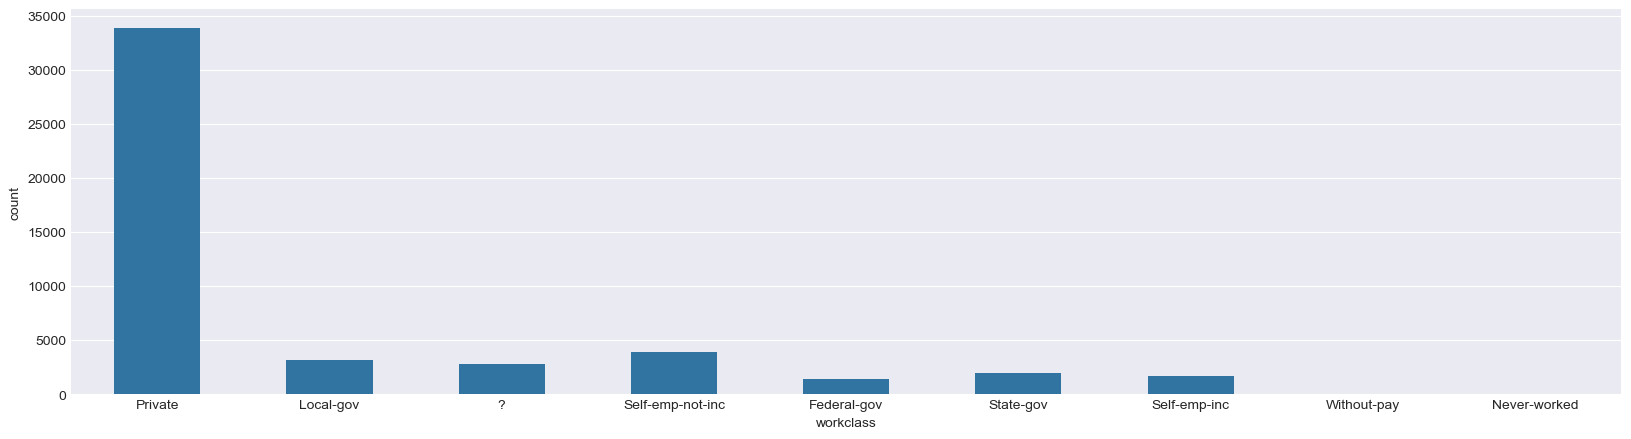

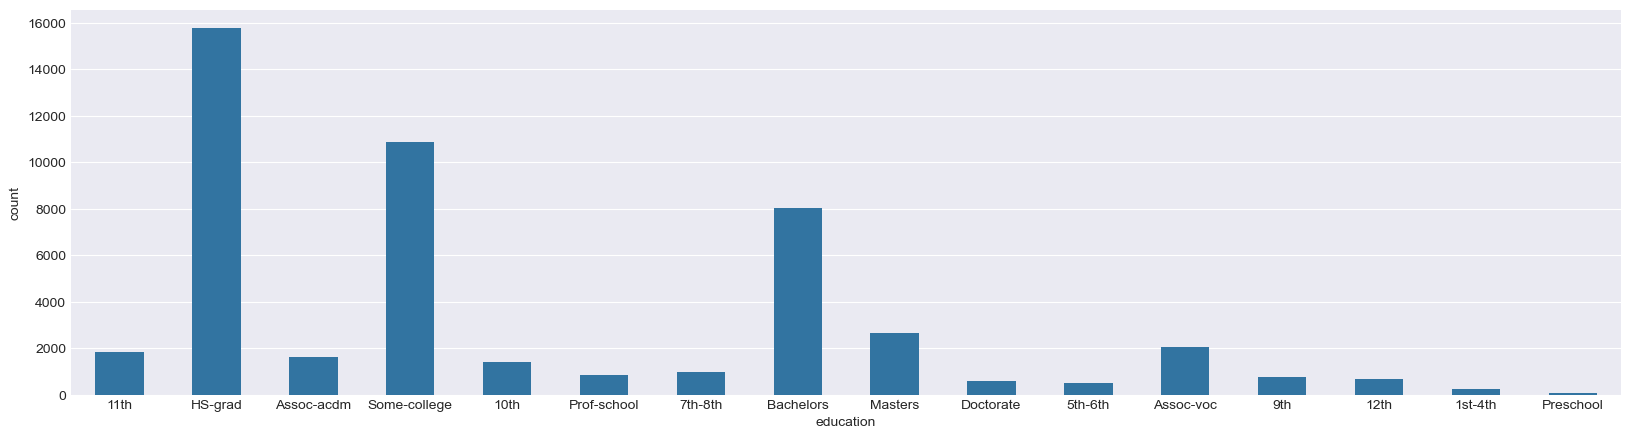

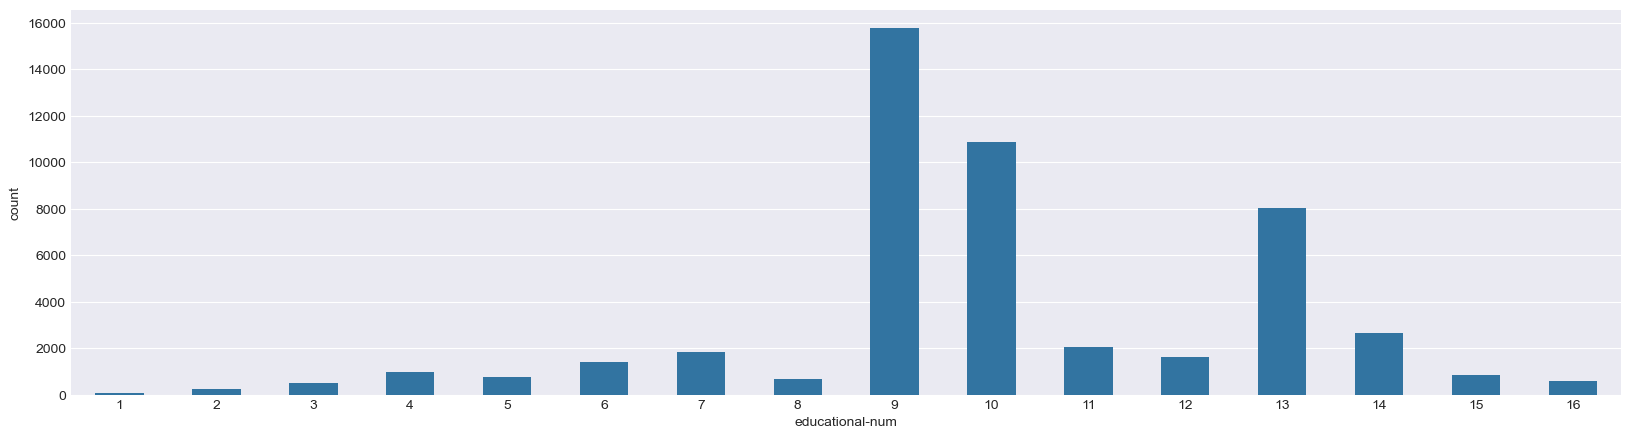

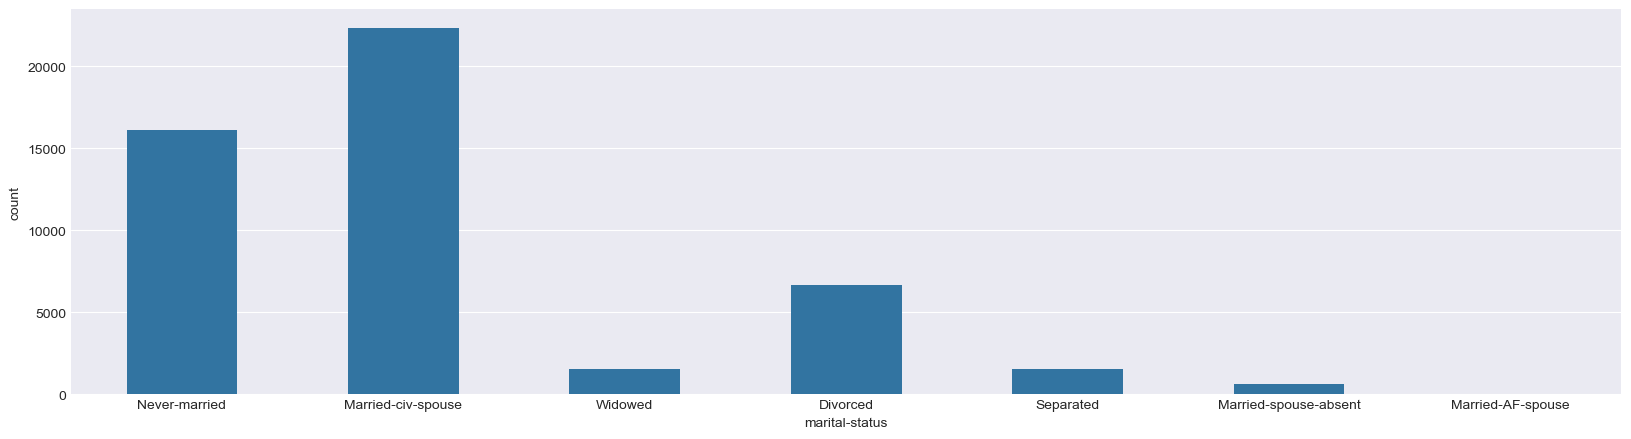

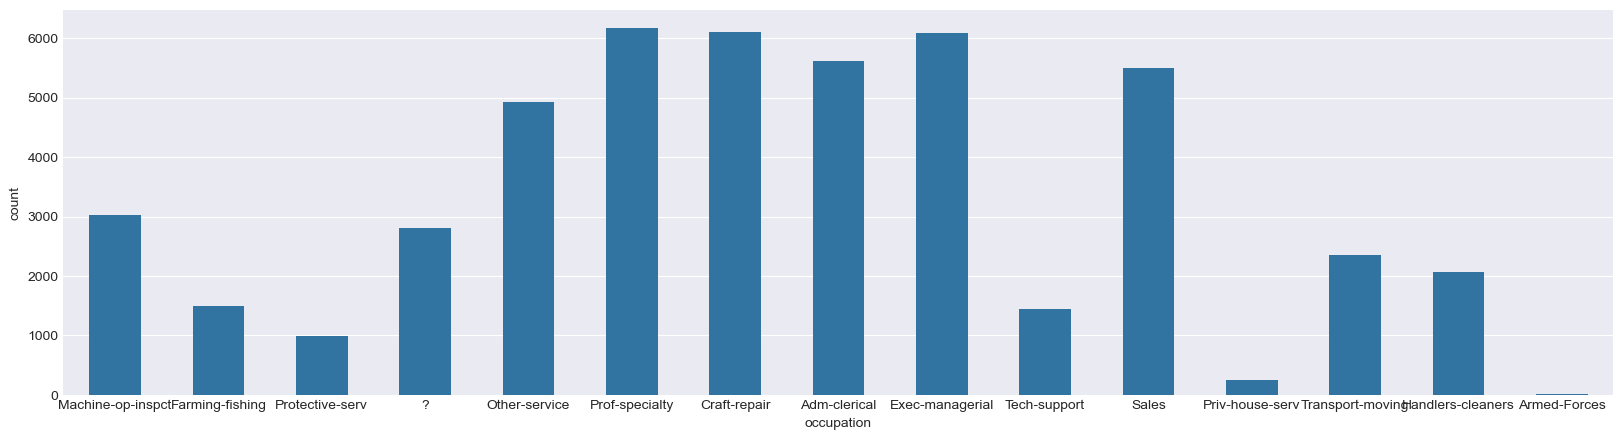

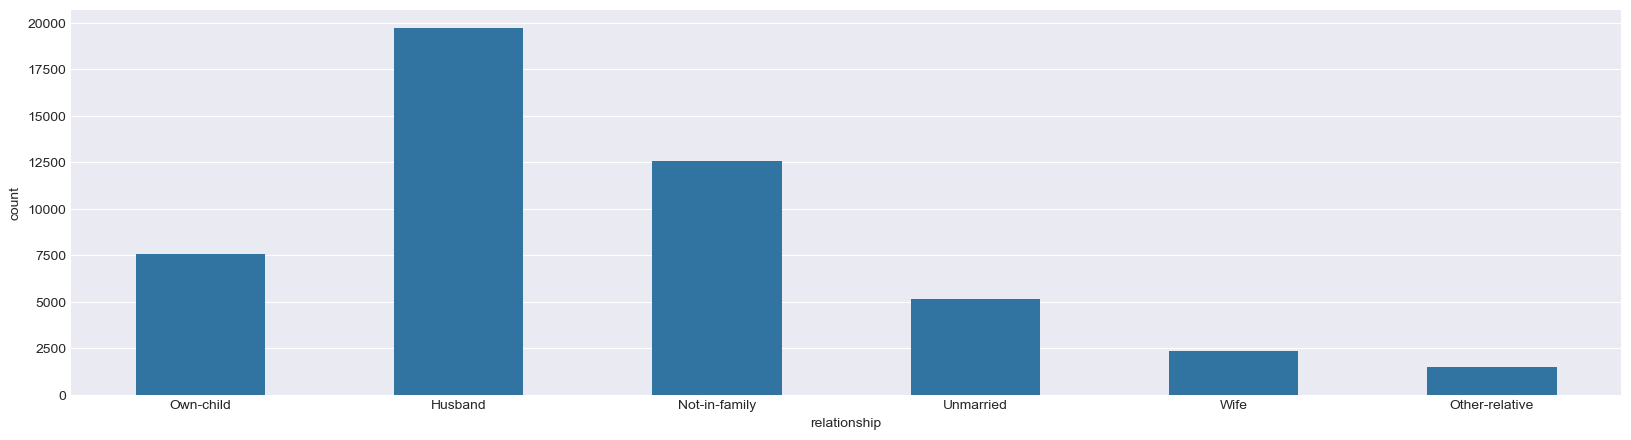

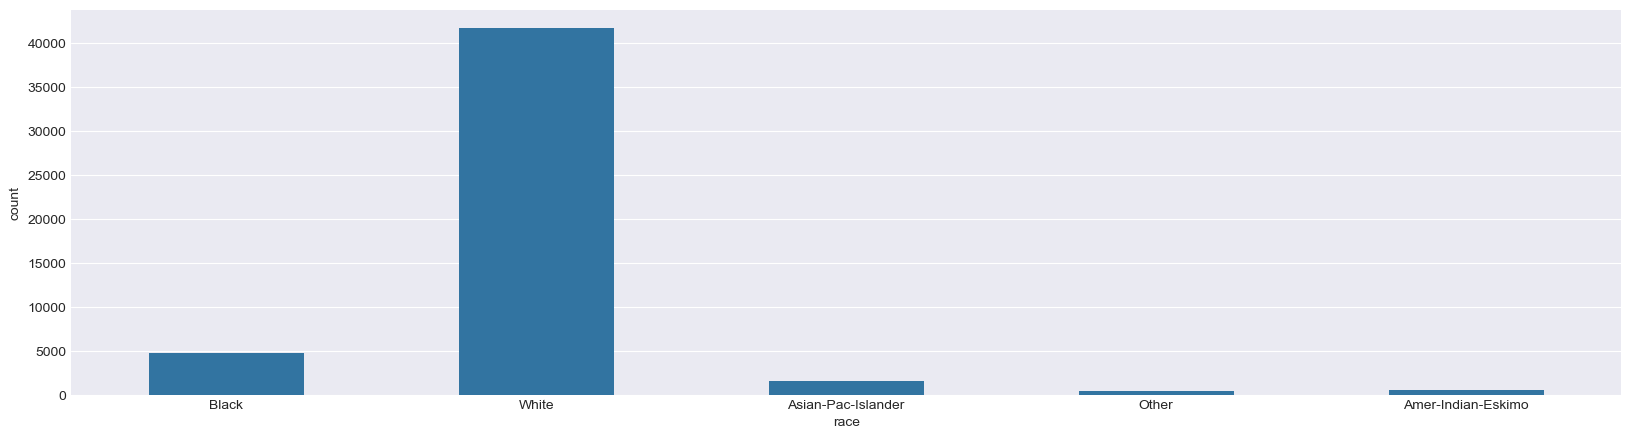

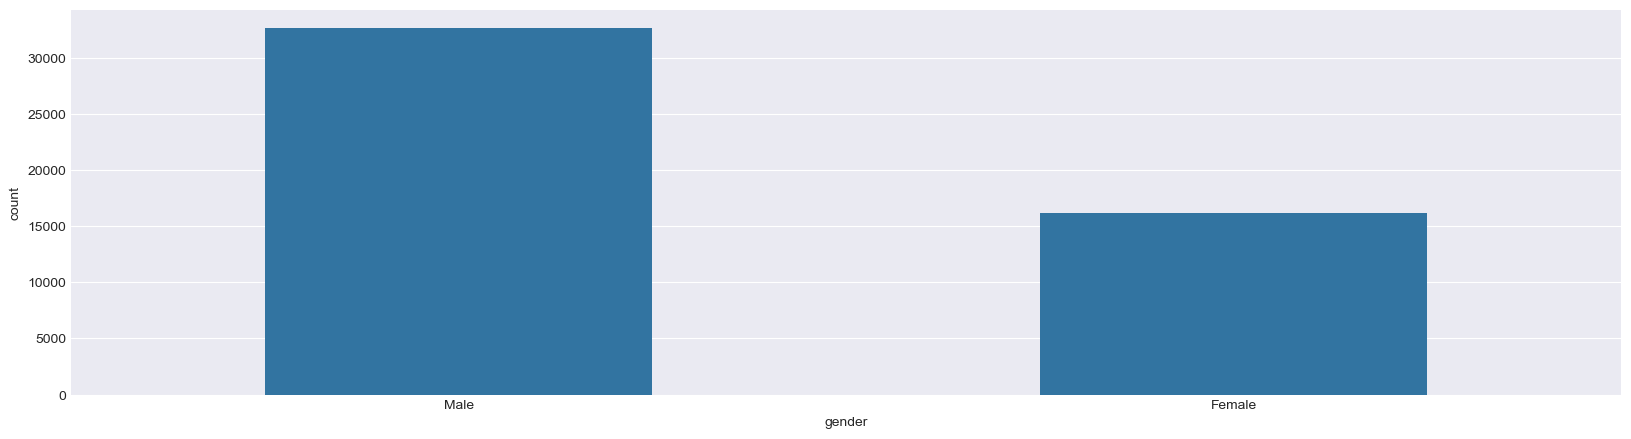

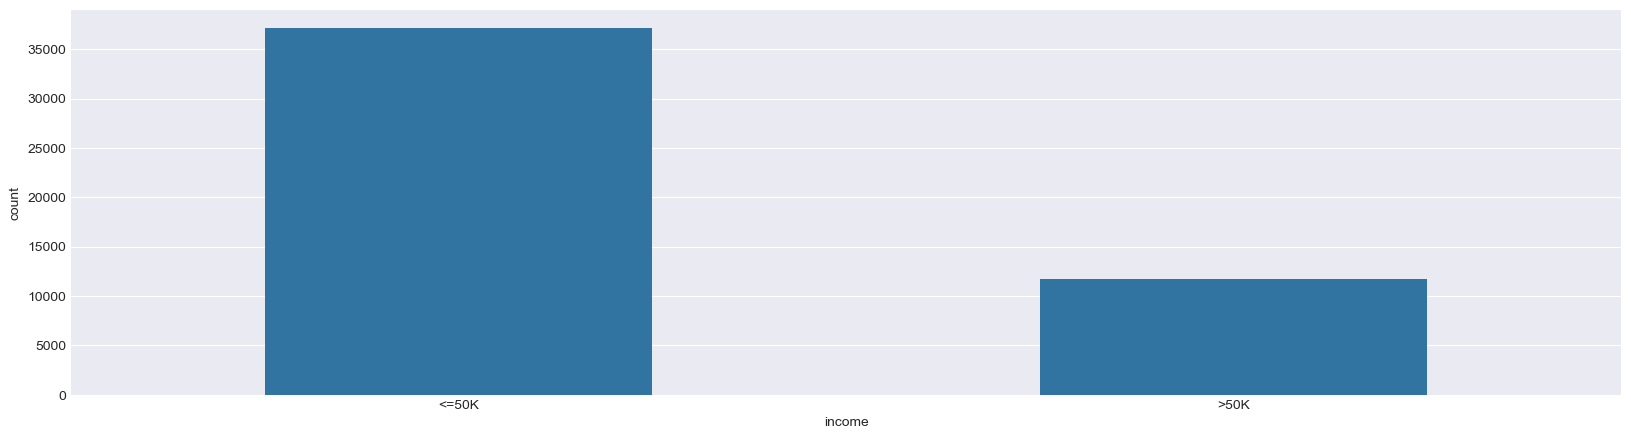

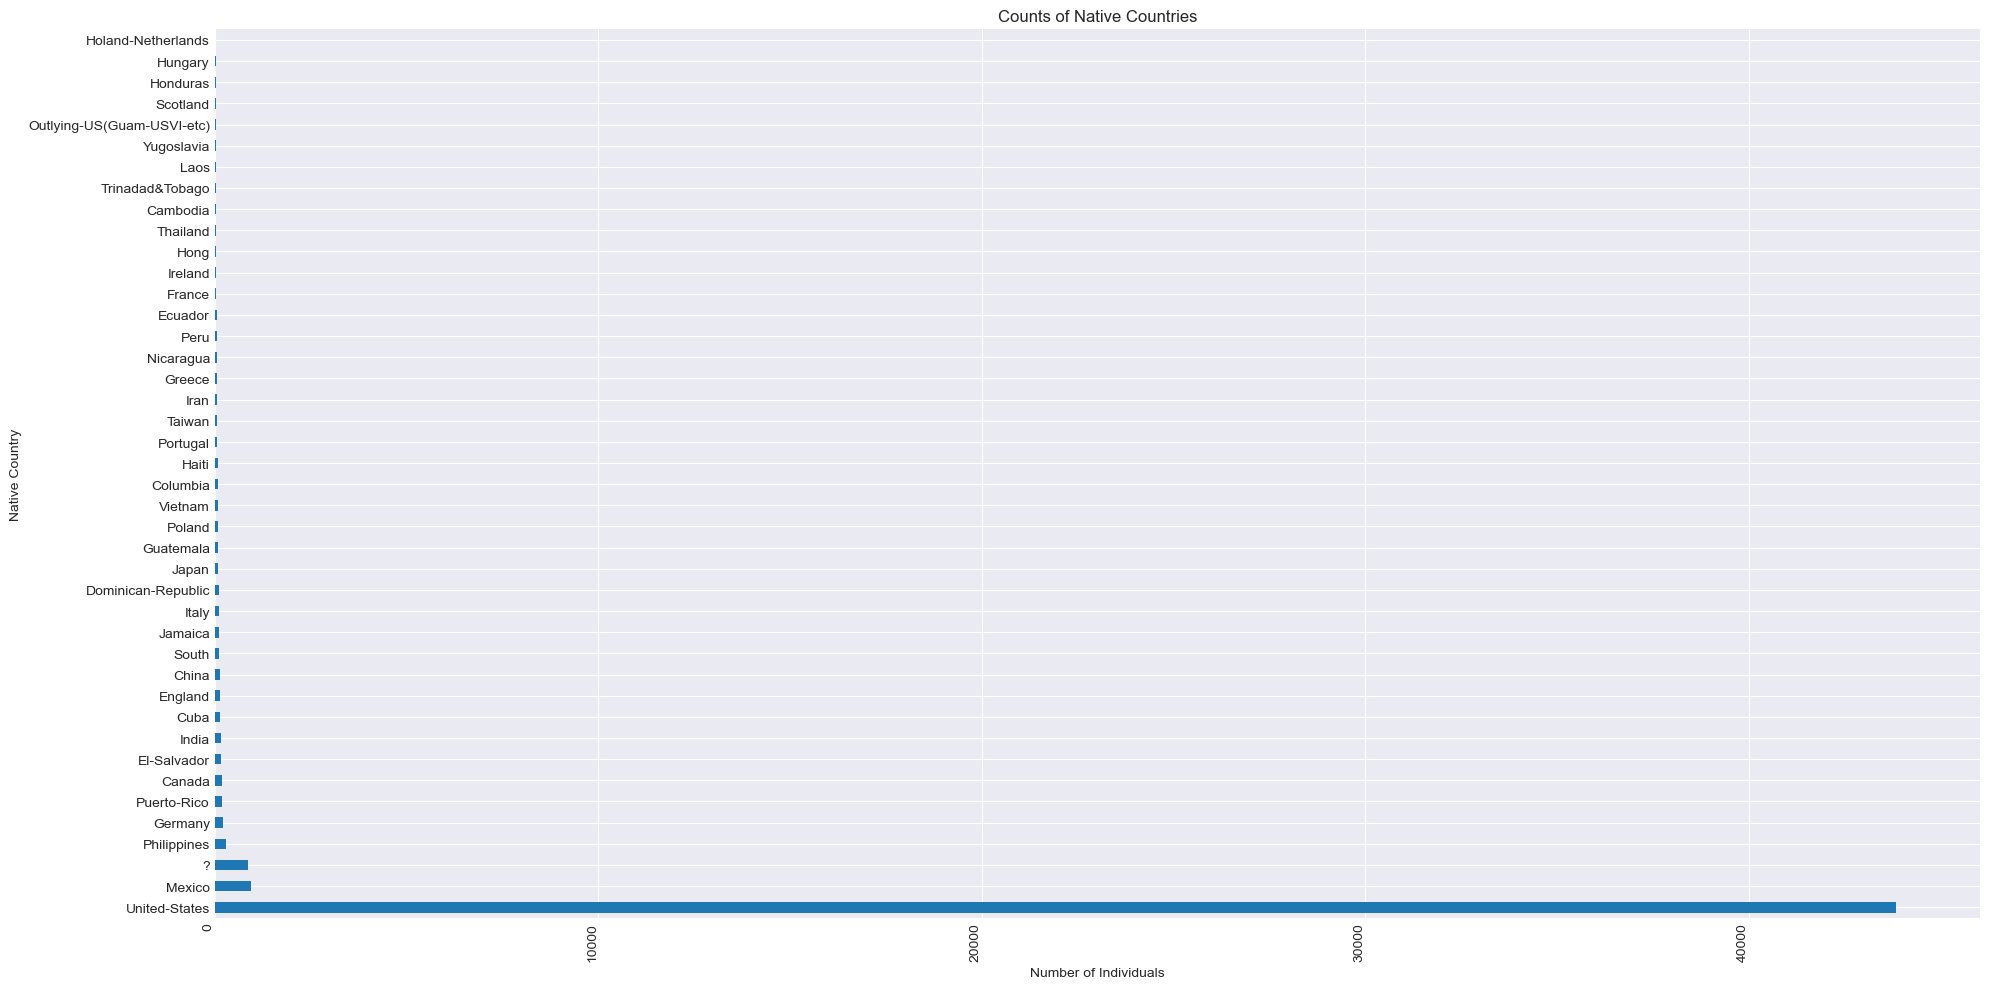

In [12]:
# Visualize distributions of categorical variables
for col in data.columns:
  if len(df[col].unique()) <20 :
    plt.figure(figsize=(20,5))
    sns.countplot(x=col, data=df,width=0.5)
plt.show()



# too many distinct values in native-countries
# to prevent overlapping of labels, native-countries is plotted separately
country_counts = df['native-country'].value_counts()
plt.figure(figsize=(20, 10))
country_counts.plot(kind='barh')
plt.title('Counts of Native Countries')
plt.xlabel('Number of Individuals')
plt.ylabel('Native Country')

plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees, align right
# or
plt.xticks(rotation=90) # Rotate 90 degrees

plt.tight_layout() # Important to adjust layout to prevent labels from being cut off
plt.show()

#### 4.4.2 Identify numerical variables

Here, we will analyze the numerical variables by creating histograms for numerical variables and also a correlation matrix. 

In [15]:
# Identifizierung numerischer Spalten
numerische_spalten = data.select_dtypes(include=['int64', 'float64']).columns
numerische_spalten

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

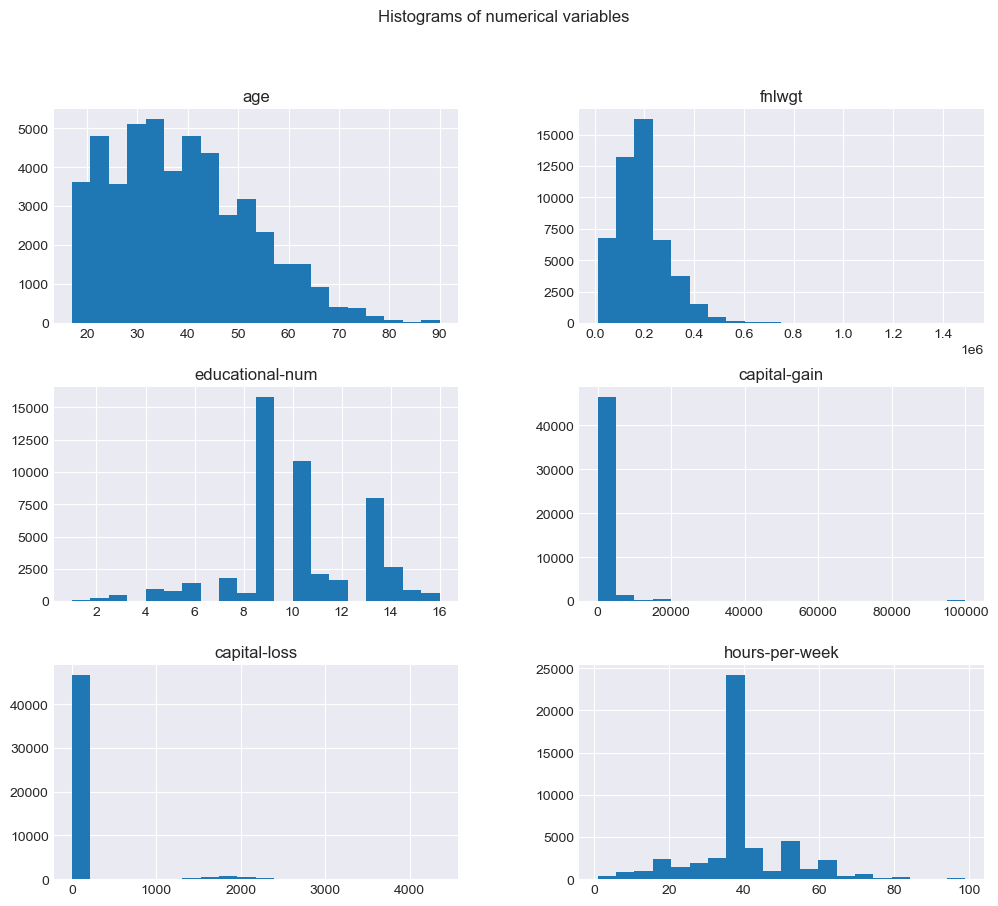

In [16]:
# create histogramm 

data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of numerical variables")
plt.show()

The dataset has 48842 entries with each entry represents a person surveyed. There are 15 columns/features and the target feature is income. It defines whether a person's annual year (income exceeds or not) based on census data. 


Features types are:
- Numerical features (6 features, int64): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
- Categorical features (9 features, object(str)): workclass, education, marital-status, occupation, relationship, race, sex, native-country, income

There are no missing data or no null data in any of the dataset columns. However, there are unknown data in columns namely 'workclass' 'occupation' 'native-country' indicated by the symbol '?'. While occupation is further classified into workclass. For example, machine-op-inspection, farming-fishing, craft-repair etc are  classified into private workclass. 

Based on the data set, we discovered that duplicated columns convey the same information such as "education" and "educational-num". Both are in fact same information. Therefore, one column can dropped and the classification of educational levels can be further aggregated. Furthermore, some columns have unnecessary detail grade, for example race. The data column could be summarized into two main groups "white" and "non-white", as the race groups other than whites are already underrepresented in the dataset. 



### 4.5 Data validation with GX (great expectations)

#### 4.5.1 Create GX dataset

In [17]:
# Pandas DataFrame in Great Expectations Dataset umwandeln
context = ge.get_context()
data_source = context.data_sources.add_pandas(name = "my_pandas_datasource")
data_asset = data_source.add_dataframe_asset(name = "my_dataframe_asset")
batch_definition = data_asset.add_batch_definition_whole_dataframe(name = "my_batch_definition")
batch = batch_definition.get_batch(batch_parameters={"dataframe": data})

In [18]:
df.shape

(48842, 15)

In [19]:
row_count_definition = ge.expectations.ExpectTableRowCountToEqual(value = 48842)
null_expectation = ge.expectations.ExpectColumnValuesToNotBeNull(column="income")
#unique_expectations = ge.expectations.ExpectColumnValuesToBeUnique(column="customerID")


validation_results = batch.validate(expect= row_count_definition)
#validation_results = batch.validate(expect= null_expectation)
#validation_results = batch.validate(expect= unique_expectations)


print(validation_results.success)

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

True


#### 4.5.2 Defining basic expectations

Define basic expectations for the data set. This is divided into two parts:

- data type and structure expectations
- value range and distribution expectations



In [20]:
# data type and structure expectations

columnExist_expectation = ge.expectations.ExpectColumnToExist(column="income")
validation_results = batch.validate(expect= columnExist_expectation)
print(validation_results.success)



Calculating Metrics:   0%|          | 0/2 [00:00<?, ?it/s]

True


In [21]:
# data type and structure expectations

NotNull_expectation = ge.expectations.ExpectColumnValuesToNotBeNull(column="income")
validation_results = batch.validate(expect= NotNull_expectation)
print(validation_results.success)


Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

True


In [22]:
# data type and structure expectations
# values must be between min/max set

# assume that no one is still working at the age of 80
BetweenAge_expectation = ge.expectations.ExpectColumnValuesToBeBetween(
    column="age", min_value=18, max_value=80  
)

# it is impossible to work more than 168 hours per week
BetweenHoursPerWeek_expectation = ge.expectations.ExpectColumnValuesToBeBetween(
    column="hours-per-week", min_value=8, max_value=168 
)


validation_resultsBetweenAge = batch.validate(expect= columnExist_expectation)
validation_resultsBetweenHoursPerWeek = batch.validate(expect= columnExist_expectation)


# print results

print(validation_resultsBetweenAge.success)
print(validation_resultsBetweenHoursPerWeek.success)


Calculating Metrics:   0%|          | 0/2 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/2 [00:00<?, ?it/s]

True
True


Secondly, the statistical expectations are checked. 


In [23]:
# assuming start working age at 18 and retirement age of 80. Our dataset is skewed towards younger employees. 
# The median should be around 30-40 years old.

expectation_Median = ge.expectations.ExpectColumnMedianToBeBetween(
    column="age", min_value=30, max_value=40 
)

validation_results = batch.validate(expect= expectation_Median)
print(validation_results.success)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

True
